In [114]:
# Imports and Helper Functions
# data Analysis
import pandas as pd
import numpy as np
import random as rng
from datetime import date, timedelta
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

#SciKit Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

from subprocess import check_output

In [116]:
# print(check_output(["ls", "../Datasets"]).decode("utf8"))
data = pd.read_excel("Datasets/fighters_records-sorted.xlsx", sheet='fights')

In [118]:
# Any results you write to the current directory are saved as output.
data['winner_lable'] = pd.to_numeric(data['winner_lable'], downcast='integer')
# data['finghter1wins'] = pd.to_numeric(data['finghter1wins'], downcast='unsigned')
# data['finghter2wins'] = pd.to_numeric(data['finghter2wins'], downcast='unsigned')
data['event_date'] = pd.to_datetime(data['event_date'])
data['winner_lable'] = pd.to_numeric(data['winner_lable'], downcast='unsigned')
data['fighter1_str'] = pd.to_numeric(data['fighter1_str'], downcast='unsigned')
data['fighter2_str'] = pd.to_numeric(data['fighter2_str'], downcast='unsigned')
data['fighter1_td'] = pd.to_numeric(data['fighter1_td'], downcast='unsigned')
data['fighter2_td'] = pd.to_numeric(data['fighter2_td'], downcast='unsigned')
data['fighter1_sub'] = pd.to_numeric(data['fighter1_sub'], downcast='unsigned')
data['fighter2_sub'] = pd.to_numeric(data['fighter2_sub'], downcast='unsigned')
data['fighter1_pass'] = pd.to_numeric(data['fighter1_pass'], downcast='unsigned')
data['fighter2_pass'] = pd.to_numeric(data['fighter2_pass'], downcast='unsigned')

In [119]:
data.dtypes

event_name               object
event_date       datetime64[ns]
details                  object
f1wd                    float64
f1hd                    float64
f1ad                    float64
f1wcd                   float64
f1lcd                   float64
f1swd                   float64
f1kowd                  float64
f1rd                    float64
f1lrd                   float64
f1tsd                   float64
f1ssd                   float64
f1sdd                   float64
f1spd                   float64
f1cpd                   float64
f1gpd                   float64
f1ttdd                  float64
f1stdd                  float64
f1tddd                  float64
f1ssubd                 float64
f1spassd                float64
f1ssweepd               float64
winner_lable            float64
winner                   object
looser                   object
fighter1wins            float64
fighter2wins             object
fighter1                 object
fighter2                 object
fighter_

## Description
From this, we can see that we have a total of 879 Columns and one dependent variable. 
The columns themselves have 4 integer types (Streaks, Previous Wins etc), 5 object types (Names, Winner - basically strings and arrays) and 870 Float types. 
This however does not give us a complete picture of our data, so we're using a few other pandas functions to get a better glimpse. 
We also had to engineer a few features that weren't available in the JSONs as explained in the data explanation in the introduction of the project. 

In [31]:
data.describe()

,f1wd,f1hd,f1ad,f1wcd,f1lcd,f1swd,f1kowd,f1rd,f1lrd,f1tsd,...,winner_lable,finghter1wins,fighter1_str,fighter2_str,fighter1_td,fighter2_td,fighter1_sub,fighter2_sub,fighter1_pass,fighter2_pass
count,8185.000000,8185.000000,6344.000000,8185.000000,8185.000000,8312.000000,8312.000000,6344.000000,6344.000000,6344.000000,...,9627.000000,9627.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000
mean,0.183384,0.113989,0.499527,1.939157,0.573366,3.370669,5.843239,2.231873,1.941047,205.943569,...,1.309027,0.676639,34.655520,29.302809,1.288507,0.924889,0.511164,0.364338,1.428336,0.842371
std,5.032394,12.801871,5.828464,13.917592,5.806279,4.239250,6.183773,25.981232,21.180507,829.637533,...,0.477376,0.467784,28.648455,26.784344,1.841838,1.527115,0.961522,0.820533,2.349522,1.659739
min,-36.000000,-187.000000,-40.000000,-57.000000,-17.000000,0.000000,0.000000,-84.000000,-48.000000,-3652.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-5.000000,-3.000000,-3.000000,-2.000000,0.000000,1.000000,-2.000000,-2.000000,-260.000000,...,1.000000,0.000000,13.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,151.000000,...,1.000000,1.000000,28.000000,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.000000,4.000000,10.000000,4.000000,5.000000,9.000000,3.000000,2.000000,631.000000,...,2.000000,1.000000,49.000000,43.000000,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000
max,36.000000,193.000000,44.000000,57.000000,17.000000,22.000000,32.000000,84.000000,48.000000,4080.000000,...,2.000000,1.000000,238.000000,206.000000,21.000000,12.000000,10.000000,9.000000,26.000000,14.000000


In [108]:
data.describe(include=['O'])

,event_name,details,winner,looser,fighter2wins,fighter1,fighter2,fighter_name,result,end_round,finish_method
count,9992,9155,9708,9558,9548,9992,9992,9992,9992,9992,9992
unique,783,418,1221,1985,10,1320,1989,1394,6,7,12
top,UFC® Fight Night™,Live on Pay-Per-View,DRAW,Jeremy Stephens,False,Anderson Silva,Jeremy Stephens,Alistair Overeem,Win,R3,Decision - Unanimous
freq,251,1397,69,27,6501,55,37,45,5035,4845,3325


### Some Notes to observe
1. Red Side seems to win slightly more than blue (867/1477 = 58.7%)
2. Donald Cerrone fights on Red side more than any other fighter, with 11 fights
3. Tim Means fights on Blue side more than any other fighter with 8
4. There are more fighters fighting debut fights. This statistic however could be skewed by the fact that our data set assumes debuts of every fighter in 2013
5. Most Fights are won by decision, and 2015 had the most fights. 
6. The Most common hometown and training location for fighters is Rei De Janeiro in Brazil
We also notice that 3 fighters don't have an age and 1 doesn't have a height. 

In [109]:
data.head()

,event_name,event_date,details,f1wd,f1hd,f1ad,f1wcd,f1lcd,f1swd,f1kowd,...,end_round,finish_method,fighter1_str,fighter2_str,fighter1_td,fighter2_td,fighter1_sub,fighter2_sub,fighter1_pass,fighter2_pass
0,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,7.0,-10.0,3.0,8.0,2.0,6.0,8.0,...,R1,KO/TKO,41.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
1,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,7.0,-10.0,3.0,8.0,2.0,6.0,8.0,...,R1,KO/TKO,41.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,0.0,3.0,3.0,5.0,-5.0,12.0,6.0,...,R2,KO/TKO,114.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0
3,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,0.0,3.0,3.0,5.0,-5.0,12.0,6.0,...,R2,KO/TKO,114.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0
4,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,0.0,-5.0,0.0,-3.0,0.0,1.0,2.0,...,R3,KO/TKO,73.0,25.0,1.0,0.0,0.0,0.0,4.0,0.0


In [112]:
data.tail()

,event_name,event_date,details,f1wd,f1hd,f1ad,f1wcd,f1lcd,f1swd,f1kowd,...,end_round,finish_method,fighter1_str,fighter2_str,fighter1_td,fighter2_td,fighter1_sub,fighter2_sub,fighter1_pass,fighter2_pass
9987,UFC® 2,1994-03-11,No Way Out,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,R1,Submission,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9988,UFC® 1,1993-11-12,The Beginning,0.0,0.0,0.0,0.0,0.0,10.0,1.0,...,R1,Submission,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
9989,UFC® 1,1993-11-12,The Beginning,0.0,0.0,0.0,0.0,0.0,10.0,1.0,...,R1,Submission,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0
9990,UFC® 1,1993-11-12,The Beginning,0.0,0.0,0.0,0.0,0.0,10.0,1.0,...,R1,Submission,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
9991,UFC® 1,1993-11-12,The Beginning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,R1,KO/TKO,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using the head() and tail() function calls of pandas lets us look at individual rows. In this case, we notice that a large number of columns in our dataset have NaN or Not a Number as an entry - this is how pandas interprets an empty field from our CSV. The reason the NaN values exist is because we have assumed that every fighter starts from zero in 2013. This means that before their first fight in the time beyond 2013, their previous record is blank. 

Pandas by default has two methods of dealing with NaN Values we can choose to either replace them with a value or drop them entirely.
Since it is highly unlikely that any of our dataset has a value that isn't null, we chose to replace all the NaN with the value 0 instead. 

In [120]:
data.fillna(value=0,inplace=True)

In [123]:
sixmonthago = date.today() - timedelta(183)

train_test_data = data.loc[data['event_date'] <= sixmonthago]
train_test_data

,event_name,event_date,details,f1wd,f1hd,f1ad,f1wcd,f1lcd,f1swd,f1kowd,...,end_round,finish_method,fighter1_str,fighter2_str,fighter1_td,fighter2_td,fighter1_sub,fighter2_sub,fighter1_pass,fighter2_pass
613,UFC Fight Night Maia vs Usman,2018-05-19,Live on TSN 2,0.0,3.0,-6.0,0.0,3.0,6.0,8.0,...,R1,KO/TKO,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
614,UFC Fight Night Maia vs Usman,2018-05-19,Live on TSN 2,0.0,3.0,-6.0,0.0,3.0,6.0,8.0,...,R1,KO/TKO,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
615,UFC Fight Night Maia vs Usman,2018-05-19,Live on TSN 2,0.0,10.0,0.0,1.0,0.0,0.0,2.0,...,R1,KO/TKO,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
616,UFC Fight Night Maia vs Usman,2018-05-19,Live on TSN 2,0.0,10.0,0.0,1.0,0.0,0.0,2.0,...,R1,KO/TKO,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
617,UFC Fight Night Maia vs Usman,2018-05-19,Live on TSN 2,0.0,-13.0,6.0,7.0,2.0,4.0,2.0,...,R1,KO/TKO,9.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
618,UFC Fight Night Maia vs Usman,2018-05-19,Live on TSN 2,0.0,-13.0,6.0,7.0,2.0,4.0,2.0,...,R1,KO/TKO,9.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
619,UFC Fight Night Maia vs Usman,2018-05-19,Live on TSN 2,0.0,-7.0,1.0,7.0,-3.0,0.0,0.0,...,R3,Decision - Unanimous,51.0,29.0,10.0,0.0,1.0,0.0,5.0,0.0
620,UFC Fight Night Maia vs Usman,2018-05-19,Live on TSN 2,0.0,-7.0,1.0,7.0,-3.0,0.0,0.0,...,R3,Decision - Unanimous,51.0,29.0,10.0,0.0,1.0,0.0,5.0,0.0
621,UFC Fight Night Maia vs Usman,2018-05-19,Live on TSN 2,0.0,-2.0,-12.0,1.0,0.0,2.0,0.0,...,R3,Submission,16.0,70.0,2.0,1.0,1.0,0.0,0.0,1.0
622,UFC Fight Night Maia vs Usman,2018-05-19,Live on TSN 2,0.0,-2.0,-12.0,1.0,0.0,2.0,0.0,...,R3,Submission,16.0,70.0,2.0,1.0,1.0,0.0,0.0,1.0


As you can see, the NaN have all been replaced with the value zero. 
Futher, it would behove us to remove identifying information from our model. And Since the Streaks and Previous Fight Columns have already been engineered, The Age Column has not been adjusted for each individual fight, but since our data is only 3 years old, it does not seem worth the effort to make an adjustment. +-3 from both fighters will add to about a .01% inaccuracy once we have combined our features. 

# Data Dictionary
| field         | type    | description                                          |
|---------------|---------|------------------------------------------------------|
| event_name    | object  | event   name                                         |
| event_date    | int64   | event date                                           |
| details       | object  | event   details (headline)                           |
| f1wd          | float64 | fighter 1 weight delta (fighter1.age - fighter2.age) |
| f1hd          | float64 | fighter   1 height delta                             |
| f1ad          | float64 | fighter1 age delta                                   |
| f1wcd         | float64 | fighter1   win count delta                           |
| f1lcd         | float64 | fighter1 lose count delta                            |
| f1swd         | float64 | fighter1   submission wins delta                     |
| f1kowd        | float64 | fighter1 knockout wins delta                         |
| f1rd          | float64 | fighter1   reach delta                               |
| f1lrd         | float64 | fighter1 leg reach delta                             |
| f1tsd         | float64 | fighter1   total strikes delta                       |
| f1ssd         | float64 | fighter1 sucessful strikes delta                     |
| f1sdd         | float64 | fighter1   striking defence delta                    |
| f1spd         | float64 | fighter1 standing portion delta                      |
| f1cpd         | float64 | fighter1   clinch portion delta                      |
| f1gpd         | float64 | fighter1 ground portion delta                        |
| f1ttdd        | float64 | fighter1   total takedowns delta                     |
| f1stdd        | float64 | fighter1 success takedowns delta                     |
| f1tddd        | float64 | fighter1   takedown defense delta                    |
| f1ssubd       | float64 | fighter1 successful submissions delta                |
| f1spassd      | float64 | fighter1   successful passes delta                   |
| f1ssweepd     | object  | fighter1 sweep delta                                 |
| winner_lable  | object  | 1 =   fighter1, 2 =fighter2, 0=draw                  |
| winner        | float64 | fighter1 or fighter2 (optional target)               |
| looser        | object  | fighter1   or fighter2 (optional target)             |
| finghter1wins | object  | true or false                                        |
| fighter2wins  | object  | true or   false                                      |
| fighter1      | object  | fighter1 name                                        |
| fighter2      | object  | fighter2   name                                      |
| fighter_name  | object  | winner or looser name                                |
| result        | object  | win,   loss, draw, NC                                |
| end_round     | float64 | R1-->R5                                              |
| finish_method | float64 | KO/TKO,   sub, Decision …                            |
| fighter1_str  | float64 | fighter1 strikes                                     |
| fighter2_str  | float64 | sighter2   strikes                                   |
| fighter1_td   | float64 | fighter1 takedowns                                   |
| fighter2_td   | float64 | fighter2   takedowns                                 |
| fighter1_sub  | float64 | fighter1 submissions                                 |
| fighter2_sub  | float64 | fighter2   submissions                               |
| fighter1_pass | float65 | fighter1 pass                                        |
| fighter2_pass | float66 | fighter2   pass                                      |

In [50]:
data.dtypes

event_name        object
event_date        object
details           object
f1wd             float64
f1hd             float64
f1ad             float64
f1wcd            float64
f1lcd            float64
f1swd            float64
f1kowd           float64
f1rd             float64
f1lrd            float64
f1tsd            float64
f1ssd            float64
f1sdd            float64
f1spd            float64
f1cpd            float64
f1gpd            float64
f1ttdd           float64
f1stdd           float64
f1tddd           float64
f1ssubd          float64
f1spassd         float64
f1ssweepd        float64
winner_lable     float64
winner            object
looser            object
finghter1wins    float64
fighter2wins      object
fighter1          object
fighter2          object
fighter_name      object
result            object
end_round         object
finish_method     object
fighter1_str     float64
fighter2_str     float64
fighter1_td      float64
fighter2_td      float64
fighter1_sub     float64


In [147]:
meta_cols = ['event_name','event_date','details','end_round','finish_method','winner',
             'looser','fighter1wins', 'fighter2wins','fighter1','fighter2','fighter_name']
data_cols = ["f1wd","f1hd","f1ad","f1wcd","f1lcd","f1swd","f1kowd","f1rd","f1lrd",
             "f1tsd","f1ssd","f1sdd","f1spd","f1cpd","f1gpd","f1ttdd","f1stdd","f1tddd",
             "f1ssubd","f1spassd","f1ssweepd", "fighter1_str","fighter2_str","fighter1_td",
             "fighter2_td","fighter1_sub","fighter2_sub","fighter1_pass","fighter2_pass"]

In [170]:
dropdata = train_test_data.drop(meta_cols,axis=1)
dropdata.describe()

,f1wd,f1hd,f1ad,f1wcd,f1lcd,f1swd,f1kowd,f1rd,f1lrd,f1tsd,...,f1ssweepd,winner_lable,fighter1_str,fighter2_str,fighter1_td,fighter2_td,fighter1_sub,fighter2_sub,fighter1_pass,fighter2_pass
count,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,...,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000
mean,0.163770,0.089988,0.253758,1.574795,0.448662,2.846785,4.921207,1.452714,1.256744,123.136262,...,0.114618,1.273697,33.982834,28.553151,1.290223,0.917582,0.516153,0.362832,1.433308,0.829619
std,4.643146,10.961497,4.513032,12.864992,5.304163,4.108400,6.098841,20.721806,16.995646,666.142590,...,1.964219,0.507611,28.606899,26.684591,1.848899,1.523936,0.971677,0.822630,2.366617,1.641386
min,-36.000000,-187.000000,-40.000000,-57.000000,-17.000000,0.000000,0.000000,-84.000000,-48.000000,-3652.000000,...,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-3.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,1.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,27.000000,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,7.000000,2.000000,4.000000,8.000000,1.000000,1.000000,295.000000,...,0.000000,2.000000,48.000000,42.000000,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000
max,36.000000,193.000000,44.000000,57.000000,17.000000,22.000000,32.000000,84.000000,48.000000,4080.000000,...,13.000000,2.000000,238.000000,206.000000,21.000000,12.000000,10.000000,9.000000,26.000000,14.000000


In [171]:
dropdata['winner_lable'] = pd.to_numeric(dropdata['winner_lable'], downcast='unsigned')
dropdata['fighter1_str'] = pd.to_numeric(dropdata['fighter1_str'], downcast='unsigned')
dropdata['fighter2_str'] = pd.to_numeric(dropdata['fighter2_str'], downcast='unsigned')
dropdata['fighter1_td'] = pd.to_numeric(dropdata['fighter1_td'], downcast='unsigned')
dropdata['fighter2_td'] = pd.to_numeric(dropdata['fighter2_td'], downcast='unsigned')
dropdata['fighter1_sub'] = pd.to_numeric(dropdata['fighter1_sub'], downcast='unsigned')
dropdata['fighter2_sub'] = pd.to_numeric(dropdata['fighter2_sub'], downcast='unsigned')
dropdata['fighter1_pass'] = pd.to_numeric(dropdata['fighter1_pass'], downcast='unsigned')
dropdata['fighter2_pass'] = pd.to_numeric(dropdata['fighter2_pass'], downcast='unsigned')

In [172]:
dropdata.dtypes

f1wd             float64
f1hd             float64
f1ad             float64
f1wcd            float64
f1lcd            float64
f1swd            float64
f1kowd           float64
f1rd             float64
f1lrd            float64
f1tsd            float64
f1ssd            float64
f1sdd            float64
f1spd            float64
f1cpd            float64
f1gpd            float64
f1ttdd           float64
f1stdd           float64
f1tddd           float64
f1ssubd          float64
f1spassd         float64
f1ssweepd        float64
winner_lable       uint8
result            object
fighter1_str       uint8
fighter2_str       uint8
fighter1_td        uint8
fighter2_td        uint8
fighter1_sub       uint8
fighter2_sub       uint8
fighter1_pass      uint8
fighter2_pass      uint8
dtype: object

In [173]:
dropdata.describe()

,f1wd,f1hd,f1ad,f1wcd,f1lcd,f1swd,f1kowd,f1rd,f1lrd,f1tsd,...,f1ssweepd,winner_lable,fighter1_str,fighter2_str,fighter1_td,fighter2_td,fighter1_sub,fighter2_sub,fighter1_pass,fighter2_pass
count,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,...,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000
mean,0.163770,0.089988,0.253758,1.574795,0.448662,2.846785,4.921207,1.452714,1.256744,123.136262,...,0.114618,1.273697,33.982834,28.553151,1.290223,0.917582,0.516153,0.362832,1.433308,0.829619
std,4.643146,10.961497,4.513032,12.864992,5.304163,4.108400,6.098841,20.721806,16.995646,666.142590,...,1.964219,0.507611,28.606899,26.684591,1.848899,1.523936,0.971677,0.822630,2.366617,1.641386
min,-36.000000,-187.000000,-40.000000,-57.000000,-17.000000,0.000000,0.000000,-84.000000,-48.000000,-3652.000000,...,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-3.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,1.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,27.000000,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,7.000000,2.000000,4.000000,8.000000,1.000000,1.000000,295.000000,...,0.000000,2.000000,48.000000,42.000000,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000
max,36.000000,193.000000,44.000000,57.000000,17.000000,22.000000,32.000000,84.000000,48.000000,4080.000000,...,13.000000,2.000000,238.000000,206.000000,21.000000,12.000000,10.000000,9.000000,26.000000,14.000000


Next we need to convert our object types of columns into categorical columns. This is done to sort by logical order

In [163]:
dropdata.head()

,f1wd,f1hd,f1ad,f1wcd,f1lcd,f1swd,f1kowd,f1rd,f1lrd,f1tsd,...,winner_lable,result,fighter1_str,fighter2_str,fighter1_td,fighter2_td,fighter1_sub,fighter2_sub,fighter1_pass,fighter2_pass
613,0.0,3.0,-6.0,0.0,3.0,6.0,8.0,4.0,-1.0,-506.0,...,1.0,Loss,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
614,0.0,3.0,-6.0,0.0,3.0,6.0,8.0,4.0,-1.0,-506.0,...,1.0,Win,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
615,0.0,10.0,0.0,1.0,0.0,0.0,2.0,-66.0,-40.0,-169.0,...,1.0,Loss,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
616,0.0,10.0,0.0,1.0,0.0,0.0,2.0,-66.0,-40.0,-169.0,...,1.0,Win,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
617,0.0,-13.0,6.0,7.0,2.0,4.0,2.0,71.0,40.0,647.0,...,1.0,Loss,9.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0


In [21]:
dropdata.info()
dropdata.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 889 entries, B__Prev to winner
dtypes: float64(873), int16(4), int64(11), int8(1)
memory usage: 10.0 MB


,B__Prev,B__Streak,B__Age,B__Height,B_HomeTown,B_Location,B__Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,...,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winner
1472,0,0,26.0,172.0,505,331,61,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1473,2,1,26.0,165.0,491,378,56,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1474,3,2,36.0,187.0,125,110,93,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1475,3,1,31.0,167.0,210,154,52,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,301.0,0.0,301.0,0
1476,2,1,31.0,187.0,501,209,84,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


## Data Correlation
While it would otherwise be normal practise to draw a heatmap or correlation matrix of our data to look for linear relationships, this is highly illogical due to the sheer number of features we're currently looking at.  Instead we examine the n largest correlations with our dependent variable (winner) to look for linear relationships - as you can see from the plot below, the relationships (if they exist) are highly non-linear. This suggests that alterations to our Data Set are required. 

Further, it seems that Round 4 statistics for the Red Fighter are the more correlating, this suggests that a split or delta sort of data set should produce better results. 

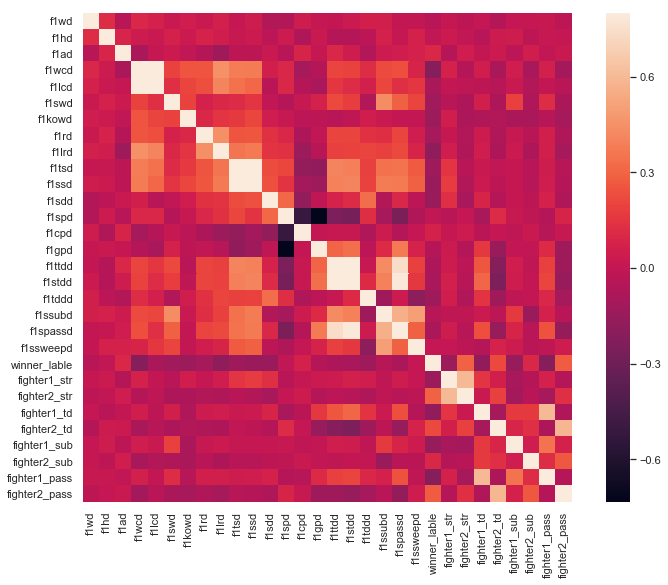

In [164]:
# Basic Correlation Matrix
corrmat = dropdata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [130]:
# Subset Correlation Matrix
k = 30 #number of variables for heatmap
corrmat = dropdata.corr()
corrmat

,f1wd,f1hd,f1ad,f1wcd,f1lcd,f1swd,f1kowd,f1rd,f1lrd,f1tsd,...,f1ssweepd,winner_lable,fighter1_str,fighter2_str,fighter1_td,fighter2_td,fighter1_sub,fighter2_sub,fighter1_pass,fighter2_pass
f1wd,1.000000,0.118007,-0.038001,0.093098,0.074410,0.021422,0.050666,0.020787,0.065965,0.014533,...,-0.002491,-0.033497,0.009963,-0.020289,0.007518,-0.045382,0.005960,0.011633,0.020470,-0.020516
f1hd,0.118007,1.000000,0.086889,0.038057,0.022128,0.070114,0.028753,0.075040,0.054388,0.019793,...,0.071388,-0.009237,0.028015,-0.006805,-0.037435,0.035323,0.043223,-0.016227,0.016283,0.005724
f1ad,-0.038001,0.086889,1.000000,-0.083848,0.009908,0.029202,-0.007417,-0.045585,-0.131598,-0.015354,...,0.069206,0.101733,-0.049638,0.045603,-0.003255,0.030593,-0.024303,0.052575,-0.006842,0.024651
f1wcd,0.093098,0.038057,-0.083848,1.000000,0.842150,0.200091,0.252295,0.251049,0.448271,0.381097,...,0.085038,-0.217636,0.071952,-0.052161,0.054300,-0.091688,0.047397,-0.097987,0.065276,-0.106648
f1lcd,0.074410,0.022128,0.009908,0.842150,1.000000,0.130385,0.201435,0.231226,0.409557,0.340621,...,0.153520,-0.086326,-0.000695,-0.011379,-0.020358,-0.039578,0.022904,-0.061457,0.000320,-0.037724
f1swd,0.021422,0.070114,0.029202,0.200091,0.130385,1.000000,0.196233,0.072997,0.103891,0.114152,...,0.205893,-0.118916,-0.033400,-0.076903,0.057163,-0.076444,0.184781,-0.068232,0.116718,-0.088643
f1kowd,0.050666,0.028753,-0.007417,0.252295,0.201435,0.196233,1.000000,0.102381,0.150584,0.165055,...,-0.001151,-0.136285,0.053702,-0.076338,-0.072773,-0.057433,-0.086686,-0.087266,-0.042788,-0.100426
f1rd,0.020787,0.075040,-0.045585,0.251049,0.231226,0.072997,0.102381,1.000000,0.442349,0.248736,...,0.046018,-0.102481,0.008846,-0.058283,0.037403,-0.063891,0.015419,-0.034659,0.060431,-0.071940
f1lrd,0.065965,0.054388,-0.131598,0.448271,0.409557,0.103891,0.150584,0.442349,1.000000,0.350721,...,0.083365,-0.181471,0.049754,-0.071596,0.045540,-0.081145,0.029935,-0.077022,0.059529,-0.104367
f1tsd,0.014533,0.019793,-0.015354,0.381097,0.340621,0.114152,0.165055,0.248736,0.350721,1.000000,...,0.268726,-0.125149,0.148622,-0.035565,0.026515,-0.007711,0.009646,-0.037812,0.043683,-0.041587


In [131]:
cols = corrmat.nlargest(k, 'winner_lable')['winner_lable'].index
cols

Index(['winner_lable', 'fighter2_str', 'fighter2_pass', 'fighter2_td', 'f1ad',
       'fighter2_sub', 'f1cpd', 'f1ssweepd', 'f1spd', 'f1hd', 'f1wd',
       'f1ssubd', 'f1gpd', 'f1ttdd', 'f1lcd', 'f1spassd', 'f1stdd', 'f1rd',
       'f1swd', 'f1tsd', 'f1tddd', 'fighter1_str', 'f1kowd', 'f1ssd', 'f1sdd',
       'fighter1_sub', 'fighter1_td', 'f1lrd', 'fighter1_pass', 'f1wcd'],
      dtype='object')

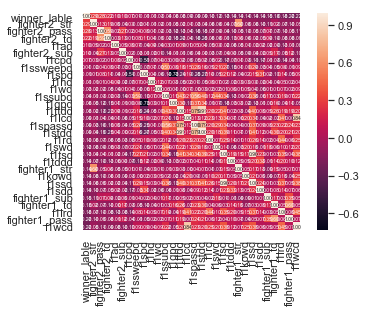

In [132]:
cm = np.corrcoef(dropdata[cols].values.T)
sns.set() # font_scale=1.25
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Modeling
We're evaluating the following models

1. Perceptron
2. Random Forests
3. Decision Trees Classifier
4. SGD Classifier
5. Linear SVC
6. Gaussian NB
7. KNN

In [228]:
 #We Store prediction of each model in our dict
# Helper Functions for our models. 

def percep(X_train,Y_train,X_test,Y_test,Models, train = True):
    if train:
        perceptron = Perceptron(max_iter = 1000, tol = 0.001)
        perceptron.fit(X_train, Y_train)
        # save the model to disk
        filename = 'Models/percep_model.sav'
        pickle.dump(perceptron, open(filename, 'wb'))
    else:
        perceptron = pickle.load(open("Models/ranfor_model.sav", 'rb'))
    Y_pred = perceptron.predict(X_test)
    Models['Perceptron'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    

def ranfor(X_train,Y_train,X_test,Y_test,Models, train = True):
    if train:
        randomfor = RandomForestClassifier(max_features="sqrt",
                                           n_estimators = 700,
                                           max_depth = None,
                                           n_jobs=-1
                                          )
        randomfor.fit(X_train,Y_train)
        filename = 'Models/ranfor_model.sav'
        pickle.dump(randomfor, open(filename, 'wb'))    
    else:
        randomfor = pickle.load(open("Models/ranfor_model.sav", 'rb'))
    Y_pred = randomfor.predict(X_test)
    Models['Random Forests'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    

def dec_tree(X_train,Y_train,X_test,Y_test,Models, train = True):
    if train:
        decision_tree = DecisionTreeClassifier()
        decision_tree.fit(X_train, Y_train)
        filename = 'Models/dtree_model.sav'
        pickle.dump(decision_tree, open(filename, 'wb'))    
    else:
        decision_tree = pickle.load(open("Models/dtree_model.sav", 'rb'))
    Y_pred = decision_tree.predict(X_test)
    Models['Decision Tree'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    

def SGDClass(X_train,Y_train,X_test,Y_test,Models, train = True):
    if train:
        sgd = SGDClassifier(max_iter = 1000, tol = 0.001)
        sgd.fit(X_train, Y_train)
        filename = 'Models/sgd_model.sav'
        pickle.dump(sgd, open(filename, 'wb'))    
    else:
        sgd = pickle.load(open("Models/sgd_model.sav", 'rb'))
    Y_pred = sgd.predict(X_test)
    Models['SGD Classifier'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    

def linSVC(X_train,Y_train,X_test,Y_test,Models, train = True):
    if train:
        linear_svc = LinearSVC()
        linear_svc.fit(X_train, Y_train)
        filename = 'Models/lsvc_model.sav'
        pickle.dump(linear_svc, open(filename, 'wb'))    
    else:
        linear_svc = pickle.load(open("Models/lsvc_model.sav", 'rb'))
    Y_pred = linear_svc.predict(X_test)
    Models['SVM'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    

def bayes(X_train,Y_train,X_test,Y_test,Models, train = True):
    if train:
        gaussian = GaussianNB()
        gaussian.fit(X_train, Y_train)
    else:
        gaussian = pickle.load(open("Models/gaussian_model.sav", 'rb'))
    Y_pred = gaussian.predict(X_test)
    Models['Bayes'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    filename = 'Models/gaussian_model.sav'
    pickle.dump(gaussian, open(filename, 'wb'))    
    

def Nearest(X_train,Y_train,X_test,Y_test,Models, train = True):
    if train:
        knn = KNeighborsClassifier(n_neighbors = 3)
        knn.fit(X_train, Y_train)
        filename = 'Models/knn_model.sav'
        pickle.dump(knn, open(filename, 'wb'))  
    else:
        knn = pickle.load(open("Models/knn_model.sav", 'rb'))
    Y_pred = knn.predict(X_test)
    Models['KNN'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]

def run_all_and_Plot(df, train = True):
    Models = dict()
    X_all = df.drop(['winner_lable'], axis=1)
    y_all = df['winner_lable']
    X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
    percep(X_train,Y_train,X_test,Y_test,Models, train)
    ranfor(X_train,Y_train,X_test,Y_test,Models, train)
    dec_tree(X_train,Y_train,X_test,Y_test,Models, train)
    SGDClass(X_train,Y_train,X_test,Y_test,Models, train)
    linSVC(X_train,Y_train,X_test,Y_test,Models, train)
    bayes(X_train,Y_train,X_test,Y_test,Models, train)
    Nearest(X_train,Y_train,X_test,Y_test,Models, train)
    return Models


def plot_bar(dict):
    labels = tuple(dict.keys())
    y_pos = np.arange(len(labels))
    values = [dict[n][0] for n in dict]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, labels,rotation='vertical')
    plt.ylabel('accuracy')
    plt.title('Accuracy of predictions')
    plt.show()


def plot_cm(dict):
    count = 1
    fig = plt.figure(figsize=(10,10))
    for model in dict:
        cm = dict[model][1]
        labels = ['W','L','D','N']
        ax = fig.add_subplot(4,4,count)
        cax = ax.matshow(cm)
        plt.title(model,y=-0.8)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        # plt.subplot(2,2,count)
        count+=1
    plt.tight_layout()
    plt.show()

SVM 0.7174840085287847
Bayes 0.697228144989339
KNN 0.7292110874200426
Decision Tree 0.92590618336887
Random Forests 0.9509594882729211
Perceptron 0.7713219616204691
SGD Classifier 0.7729211087420043


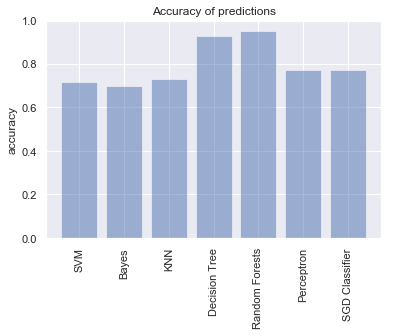

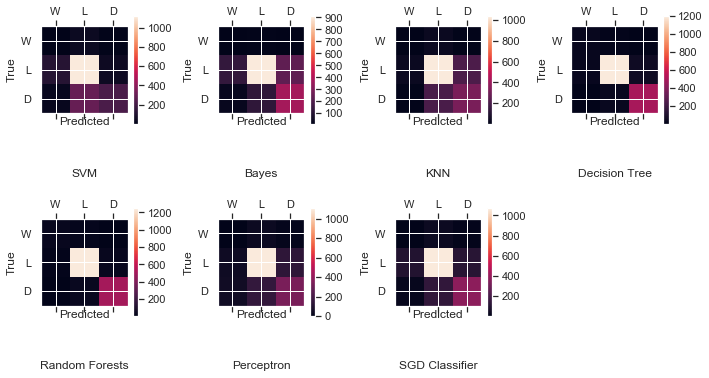

In [230]:
# dropdata = dropdata.drop(['result'],axis=1)
accuracies = run_all_and_Plot(dropdata)
CompareAll = dict()
CompareAll['Baseline'] = accuracies
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
plot_bar(accuracies)
plot_cm(accuracies)

Theoretically, we should get best results from our Random Forests Model, thus attempting to tune hyper parameters using GridSearch from Scikit learn

## Conclusion
Our model has a best predictive value of 94% on average between runs. Despite a very low accuracy model, I believe this is the best possible given the amount of available data and its inherent noise. 

## Future Work
1. With time, data available should increase
2. Further enrichement/manipulations of data set. 


In [178]:
accuracies['Random Forests']

[0.9525586353944563, array([[  30,   16,    3],
        [  12, 1245,   27],
        [   1,   30,  512]], dtype=int64)]

In [180]:
loaded_model = pickle.load(open("Models/ranfor_model.sav", 'rb'))

In [189]:
prediction_data = data.loc[data['event_date'] > sixmonthago]
prediction_data = prediction_data.loc[prediction_data['event_date'] > sixmonthago]
prediction_data

,event_name,event_date,details,f1wd,f1hd,f1ad,f1wcd,f1lcd,f1swd,f1kowd,...,end_round,finish_method,fighter1_str,fighter2_str,fighter1_td,fighter2_td,fighter1_sub,fighter2_sub,fighter1_pass,fighter2_pass
0,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,7.0,-10.0,3.0,8.0,2.0,6.0,8.0,...,R1,KO/TKO,41.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
1,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,7.0,-10.0,3.0,8.0,2.0,6.0,8.0,...,R1,KO/TKO,41.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,0.0,3.0,3.0,5.0,-5.0,12.0,6.0,...,R2,KO/TKO,114.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0
3,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,0.0,3.0,3.0,5.0,-5.0,12.0,6.0,...,R2,KO/TKO,114.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0
4,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,0.0,-5.0,0.0,-3.0,0.0,1.0,2.0,...,R3,KO/TKO,73.0,25.0,1.0,0.0,0.0,0.0,4.0,0.0
5,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,0.0,-5.0,0.0,-3.0,0.0,1.0,2.0,...,R3,KO/TKO,73.0,25.0,1.0,0.0,0.0,0.0,4.0,0.0
6,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,0.0,-2.0,-2.0,2.0,-2.0,7.0,0.0,...,R3,Decision - Unanimous,76.0,51.0,0.0,1.0,0.0,0.0,2.0,0.0
7,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,0.0,-2.0,-2.0,2.0,-2.0,7.0,0.0,...,R3,Decision - Unanimous,76.0,51.0,0.0,1.0,0.0,0.0,2.0,0.0
8,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,0.0,2.0,0.0,6.0,-4.0,6.0,4.0,...,R4,Submission,70.0,51.0,3.0,0.0,1.0,0.0,5.0,0.0
9,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,0.0,2.0,0.0,6.0,-4.0,6.0,4.0,...,R4,Submission,70.0,51.0,3.0,0.0,1.0,0.0,5.0,0.0


In [195]:
pdata = prediction_data.drop(meta_cols,axis=1)
pdata = pdata.loc[pdata['result'] != "UPCOMING"]
pdata.head()

,f1wd,f1hd,f1ad,f1wcd,f1lcd,f1swd,f1kowd,f1rd,f1lrd,f1tsd,...,winner_lable,result,fighter1_str,fighter2_str,fighter1_td,fighter2_td,fighter1_sub,fighter2_sub,fighter1_pass,fighter2_pass
0,7.0,-10.0,3.0,8.0,2.0,6.0,8.0,-2.0,38.0,378.0,...,1.0,Win,41.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,-10.0,3.0,8.0,2.0,6.0,8.0,-2.0,38.0,378.0,...,1.0,Loss,41.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,3.0,3.0,5.0,-5.0,12.0,6.0,4.0,0.0,382.0,...,1.0,Win,114.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,3.0,3.0,5.0,-5.0,12.0,6.0,4.0,0.0,382.0,...,1.0,Loss,114.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-5.0,0.0,-3.0,0.0,1.0,2.0,-5.0,-3.0,503.0,...,1.0,Loss,73.0,25.0,1.0,0.0,0.0,0.0,4.0,0.0


In [196]:
pdata_X = pdata.drop(['result','winner_lable'],axis=1)
pdata_X.head()

,f1wd,f1hd,f1ad,f1wcd,f1lcd,f1swd,f1kowd,f1rd,f1lrd,f1tsd,...,f1spassd,f1ssweepd,fighter1_str,fighter2_str,fighter1_td,fighter2_td,fighter1_sub,fighter2_sub,fighter1_pass,fighter2_pass
0,7.0,-10.0,3.0,8.0,2.0,6.0,8.0,-2.0,38.0,378.0,...,7.0,0.0,41.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,-10.0,3.0,8.0,2.0,6.0,8.0,-2.0,38.0,378.0,...,7.0,0.0,41.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,3.0,3.0,5.0,-5.0,12.0,6.0,4.0,0.0,382.0,...,-14.0,-9.0,114.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,3.0,3.0,5.0,-5.0,12.0,6.0,4.0,0.0,382.0,...,-14.0,-9.0,114.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-5.0,0.0,-3.0,0.0,1.0,2.0,-5.0,-3.0,503.0,...,-3.0,3.0,73.0,25.0,1.0,0.0,0.0,0.0,4.0,0.0


In [197]:
pdata_Y = pdata['winner_lable']
pdata_Meta = pd.concat([prediction_data[meta_cols], pdata['result']], axis=1)
pdata_Meta.head()

,event_name,event_date,details,end_round,finish_method,winner,looser,fighter1wins,fighter2wins,fighter1,fighter2,fighter_name,result
0,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,R1,KO/TKO,Vicente Luque,Jalin Turner,1.0,False,Vicente Luque,Jalin Turner,Vicente Luque,Win
1,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,R1,KO/TKO,Vicente Luque,Jalin Turner,1.0,False,Vicente Luque,Jalin Turner,Jalin Turner,Loss
2,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,R2,KO/TKO,Tony Ferguson,Anthony Pettis,1.0,False,Tony Ferguson,Anthony Pettis,Tony Ferguson,Win
3,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,R2,KO/TKO,Tony Ferguson,Anthony Pettis,1.0,False,Tony Ferguson,Anthony Pettis,Anthony Pettis,Loss
4,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,R3,KO/TKO,Scott Holtzman,Alan Patrick,1.0,False,Scott Holtzman,Alan Patrick,Alan Patrick,Loss


In [198]:
predictions = loaded_model.predict(pdata_X)
predictions = pd.DataFrame(predictions, columns=["predictions"])
predictions.head()

,predictions
0,1
1,1
2,1
3,1
4,1


In [199]:
predicted_results = pd.concat([pdata_Meta, pdata_Y, predictions], axis=1)
predicted_results = predicted_results.dropna()
predicted_results.head()

,event_name,event_date,details,end_round,finish_method,winner,looser,fighter1wins,fighter2wins,fighter1,fighter2,fighter_name,result,winner_lable,predictions
0,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,R1,KO/TKO,Vicente Luque,Jalin Turner,1.0,False,Vicente Luque,Jalin Turner,Vicente Luque,Win,1.0,1.0
1,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,R1,KO/TKO,Vicente Luque,Jalin Turner,1.0,False,Vicente Luque,Jalin Turner,Jalin Turner,Loss,1.0,1.0
2,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,R2,KO/TKO,Tony Ferguson,Anthony Pettis,1.0,False,Tony Ferguson,Anthony Pettis,Tony Ferguson,Win,1.0,1.0
3,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,R2,KO/TKO,Tony Ferguson,Anthony Pettis,1.0,False,Tony Ferguson,Anthony Pettis,Anthony Pettis,Loss,1.0,1.0
4,UFC 229 Khabib vs McGregor,2018-10-06,Live on Pay-Per-View,R3,KO/TKO,Scott Holtzman,Alan Patrick,1.0,False,Scott Holtzman,Alan Patrick,Alan Patrick,Loss,1.0,1.0


In [202]:
scores = dict()
scores['Random Forests'] = [accuracy_score(pdata_Y, predictions),confusion_matrix(pdata_Y, predictions)]
scores

{'Random Forests': [0.8207343412526998, array([[  0,   2,   6],
         [  0, 236,  18],
         [  0,  57, 144]], dtype=int64)]}

## Further predictions
When given totally new prediction data, the model performed 82% accuracy, but that's mainly attributed to the draw results as shown in the graph below. Still not bad eh? ; )


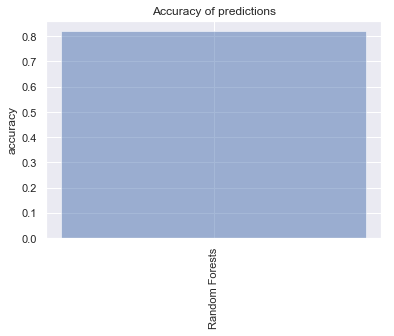

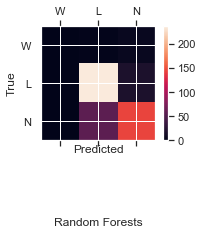

In [205]:
plot_bar(scores)
plot_cm(scores)

In [206]:
predicted_results.to_excel("Predictions/rft_predictions_271118.xlsx")

In [231]:
pscores = run_all_and_Plot(pdata.drop(['result'], axis=1), train=False)

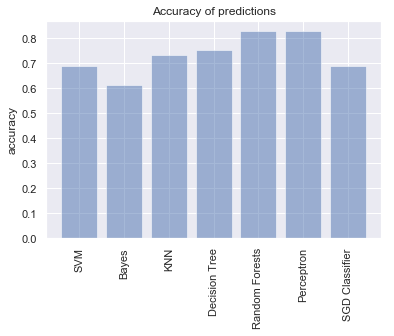

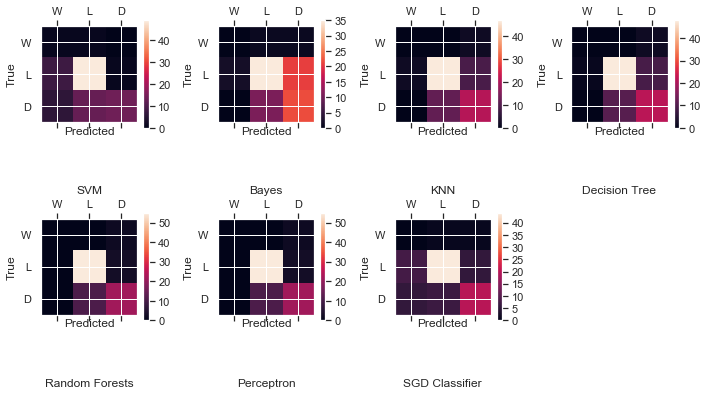

In [232]:
plot_bar(pscores)
plot_cm(pscores)